In [18]:
import os.path

import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter


In [19]:
dataset = "../run3_dataset_10000_test.h5"
#dataset = "../run_5_case3b_40000.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [20]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

ARS01_DBPM_0760_X ARS01_DBPM_0760_Y
ARS01_DBPM_1080_X ARS01_DBPM_1080_Y
ARS01_DBPM_1460_X ARS01_DBPM_1460_Y
ARS01_DBPM_1900_X ARS01_DBPM_1900_Y
ARS01_DBPM_2410_X ARS01_DBPM_2410_Y
ARS01_DBPM_2910_X ARS01_DBPM_2910_Y
ARS01_DBPM_4220_X ARS01_DBPM_4220_Y
ARS01_DBPM_4720_X ARS01_DBPM_4720_Y
ARS01_DBPM_5250_X ARS01_DBPM_5250_Y
ARS01_DBPM_5880_X ARS01_DBPM_5880_Y
ARS02_DBPM_1080_X ARS02_DBPM_1080_Y
ARS02_DBPM_1460_X ARS02_DBPM_1460_Y
ARS02_DBPM_1900_X ARS02_DBPM_1900_Y
ARS02_DBPM_2410_X ARS02_DBPM_2410_Y
ARS02_DBPM_2910_X ARS02_DBPM_2910_Y
ARS02_DBPM_4220_X ARS02_DBPM_4220_Y
ARS02_DBPM_4720_X ARS02_DBPM_4720_Y
ARS02_DBPM_5250_X ARS02_DBPM_5250_Y
ARS02_DBPM_5880_X ARS02_DBPM_5880_Y
ARS03_DBPM_0810_X ARS03_DBPM_0810_Y
ARS03_DBPM_1080_X ARS03_DBPM_1080_Y
ARS03_DBPM_1460_X ARS03_DBPM_1460_Y
ARS03_DBPM_1900_X ARS03_DBPM_1900_Y
ARS03_DBPM_2410_X ARS03_DBPM_2410_Y
ARS03_DBPM_2910_X ARS03_DBPM_2910_Y
ARS03_DBPM_4220_X ARS03_DBPM_4220_Y
ARS03_DBPM_4720_X ARS03_DBPM_4720_Y
ARS03_DBPM_5250_X ARS03_DBPM

In [21]:
input_df.head()

ARS01_DBPM_0760_X  ARS01_DBPM_1080_X  ARS01_DBPM_1460_X  \
221           -0.546829          -0.156270           0.072100   
7693          -0.451926          -0.056627           0.110686   
8952          -0.644923          -0.158573           0.094584   
3662          -0.557040          -0.171334           0.064673   
8593          -0.598743          -0.198813           0.057061   

      ARS01_DBPM_1900_X  ARS01_DBPM_2410_X  ARS01_DBPM_2910_X  \
221            0.341886          -0.512406           0.668353   
7693           0.291316          -0.490912           0.685585   
8952           0.386379          -0.619877           0.804661   
3662           0.346034          -0.507022           0.655392   
8593           0.365506          -0.526110           0.668558   

      ARS01_DBPM_4220_X  ARS01_DBPM_4720_X  ARS01_DBPM_5250_X  \
221           -0.600898           0.513508          -0.214899   
7693          -0.653669           0.588086          -0.297804   
8952          -0.751115           0.636169          -0.292992   
3662          -0.581434           0.493279          -0.196612   
8593          -0.585754           0.488735          -0.183760   

      ARS01_DBPM_5880_X  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
221            0.050106  ...           0.090532           0.265221   
7693           0.156848  ...           0.078212           0.246131   
8952           0.088001  ...           0.064766           0.248464   
3662           0.031562  ...           0.095161           0.269186   
8593           0.008085  ...           0.084963           0.257759   

      ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
221            0.272789           0.288359           0.171183   
7693           0.260854           0.282907           0.175803   
8952           0.274394           0.306253           0.194488   
3662           0.273527           0.286074           0.167432   
8593           0.268941           0.287359           0.173449   

      ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
221           -0.014746          -0.131000          -0.175798   
7693          -0.003915          -0.122848          -0.173267   
8952          -0.003906          -0.142185          -0.207554   
3662          -0.017060          -0.129964          -0.171457   
8593          -0.010831          -0.128240          -0.175980   

      ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
221           -0.055354           0.295803  
7693          -0.061123           0.272585  
8952          -0.090611           0.264810  
3662          -0.050061           0.300513  
8593          -0.060428           0.275779  

[5 rows x 230 columns]

In [22]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
221         -0.312519        -0.242236         0.328337         0.051800   
7693        -0.311446        -0.239240         0.331372         0.051657   
8952        -0.311143        -0.238225         0.330905         0.051642   
3662        -0.311787        -0.240175         0.330644         0.051679   
8593        -0.310986        -0.238456         0.331360         0.051648   

      ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
221          0.438325         0.431851         0.434457         0.434370   
7693         0.438253         0.431778         0.434385         0.434296   
8952         0.438211         0.431736         0.434343         0.434253   
3662         0.438253         0.431778         0.434384         0.434295   
8593         0.438241         0.431765         0.434369         0.434278   

      ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  ARS12_MCOY_1490  \
221          0.170410         0.352321  ...        -0.614665        -0.326920   
7693         0.170321         0.355848  ...        -0.609494        -0.327232   
8952         0.170497         0.354434  ...        -0.631967        -0.330002   
3662         0.170538         0.353589  ...        -0.604532        -0.327516   
8593         0.169490         0.350949  ...        -0.611130        -0.327778   

      ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  ARS12_MCOY_4240  \
221          0.037826        -0.444931        -0.489554        -0.486590   
7693         0.037843        -0.444933        -0.489553        -0.486589   
8952         0.037994        -0.444942        -0.489551        -0.486588   
3662         0.037859        -0.444933        -0.489553        -0.486589   
8593         0.037874        -0.444935        -0.489554        -0.486589   

      ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  ARS01_MCOY_0400  
221         -0.226255        -0.328291         0.006523        -0.132251  
7693        -0.226254        -0.328517         0.004239        -0.132736  
8952        -0.226253        -0.324142         0.013969        -0.132568  
3662        -0.226254        -0.328866         0.007895        -0.130807  
8593        -0.226254        -0.322287         0.011346        -0.132536  

[5 rows x 230 columns]

In [23]:
input_main =  input_df.values
output = output_df.values

In [24]:
path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/"
paths = [path + i +"/" for i in os.listdir(path) if not i.split(".")[-1] == "h5"]

In [25]:
print(paths)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_10000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_20000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_30000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_40000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_10000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_20000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_30000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_40000/']


In [26]:

# Path to your HDF5 file
file_path = path + "Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.2576144994919263 0.27968792393896313 -0.03135473106389157 -0.03779608008410241


In [27]:
print(orbit_max)

[0.         0.09124299 0.17481481 0.64514216 0.         1.04240415
 0.         0.84693628 0.         0.31985602 0.86181494 0.48704436
 0.25884748 0.14331697 0.884821   0.         1.15327208 0.
 1.17699092 1.16940568 1.17920695 0.30520479 0.         1.15151573
 0.         0.99035669 0.01331262 0.25855606 0.88792561 0.
 0.         1.05485584 0.18843699 0.         1.27268031 0.
 1.50050551 0.         0.         0.         0.         1.19230567
 0.         1.36845274 0.         0.6680484  0.33497129 0.
 1.8408489  0.81839528 0.         0.92266789 0.41691514 0.
 1.5124456  0.         2.25998258 1.04220696 0.88721655 0.14796726
 0.         1.17550418 0.         1.19213565 0.         0.51395476
 0.5158606  0.         0.         0.61802623 0.066523   0.
 0.84083657 0.         1.0117936  0.         0.         0.
 0.         1.06482765 0.         0.97162954 0.         0.23143128
 0.58073454 0.         0.56517118 0.34410227 0.33870724 0.
 0.82855601 0.         0.93260635 0.         0.8175024  1.0

In [28]:
input = scaling(input_main,orbit_min,orbit_max,0,1)


In [29]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(10100, 230)


In [30]:
hists = []
important_paths = []
print(paths)
for i in paths[:]:
    #print(i)
    hist_path = f"/{i}/Data_simulation.h5"
    with h5py.File(hist_path, 'r') as hdf:
        loss = hdf['loss'][:]
        val_loss = hdf['val_loss'][:]
        label = i.split("/")[-2]
        print(val_loss[-1])
        if val_loss[-1] < 0.1:
            hists.append({"loss": loss, "val_loss": val_loss, "label": label,"path":i,"score": val_loss[-1]})
            #important_paths.append(i)
print(hists)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_10000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_20000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_30000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0.1_40000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_-1/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_10000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_20000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_30000/', '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245/2_230_5e-05_1e-08_0_40000/']
0.0122024487056

In [31]:
sorted_hists = sorted(hists, key=lambda hist: hist["score"])

In [32]:
print(len(sorted_hists))
print(sorted_hists[0]["score"])

10
0.009922246568413041


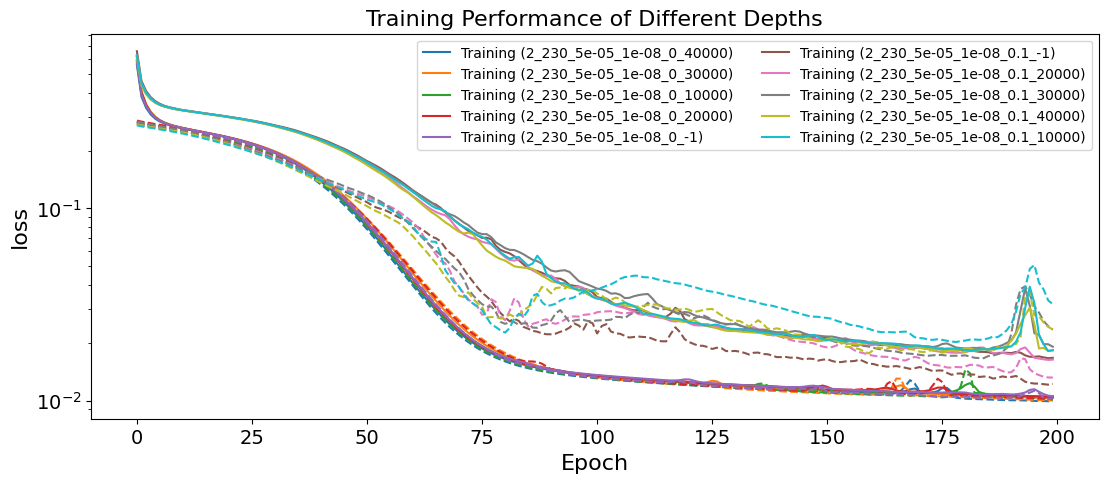

In [33]:

params = {'axes.labelsize': 16,
          'axes.titlesize': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,}
plt.rcParams.update(params)
fig,ax = plt.subplots(1,figsize=(13,5))
ax = [ax]
colors = plt.get_cmap('tab10').colors
for i, data in enumerate(sorted_hists[:10]):
    color = colors[i]
    loss = data['loss']
    loss = savgol_filter(loss,2,1)
    val_loss = data['val_loss']
    val_loss = savgol_filter(val_loss,2,1)
    label = data['label']
    ax[0].plot(loss,label=f"Training ({label})",color = color)
    ax[0].plot(val_loss,linestyle='--',color = color) 
for axi in ax:
    axi.set_yscale('log')
    axi.legend(ncol =2)
    #axi.set_ylim(1e-3,2e-2)
    #axi.set_xlim(0,100)
    axi.set_xlabel("Epoch")
    axi.set_ylabel("loss")
    axi.set_title("Training Performance of Different Depths")
#fig.savefig("figures/test_tune_80/loss_vs_epochs.png")

In [34]:
results = []
for i in sorted_hists[:10]:
    model_path = f"/{i['path']}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)
    #print(model.summary())
    inference =model.predict(input)
    inference = scaling_reverse(inference,corr_min,corr_max,0,1)
    #print(np.mean((inference-output)**2,axis=0))
    #value = (np.mean(np.abs(inference-output))/np.mean(np.abs(output))*100)
    #print(np.mean((inference-output)**2))
    value = (np.mean(np.abs(inference-output)))
    results.append({'value':value, 'label':i['label']})

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
np.mean(output,axis=0)

array([-0.3110478 , -0.23993397,  0.33054301,  0.05167183,  0.43823764,
        0.43176282,  0.43436874,  0.4342797 ,  0.1699936 ,  0.35251088,
       -1.60501121, -0.22696885, -1.05849915, -0.55562103, -0.55163453,
       -0.54970012, -0.58536811, -0.87839927, -0.30972936, -0.15162649,
       -0.06116862,  0.33289844, -0.27501334,  0.15477575,  0.14993338,
        0.15226359,  0.14330593, -0.08492459,  0.144269  , -0.09523817,
        0.0491399 , -1.08459224, -0.56324344, -0.56028143, -0.55844938,
       -0.59392516, -0.92231523, -0.65233217,  0.30548644, -0.24755425,
        0.46954743,  0.29683353,  0.61436802,  0.60478185,  0.60723649,
        0.61735295,  0.39239657, -0.47111634, -0.73673818, -0.23353892,
       -1.24117189, -0.75292515, -0.74517798, -0.74333603, -0.78613884,
       -1.09289024, -0.48166001, -0.47961103, -0.45282162,  0.14019344,
       -0.12131889,  0.24579142,  0.24081616,  0.24316955,  0.2390381 ,
       -0.03395357, -0.48385443,  0.72303745,  0.84139848,  1.39

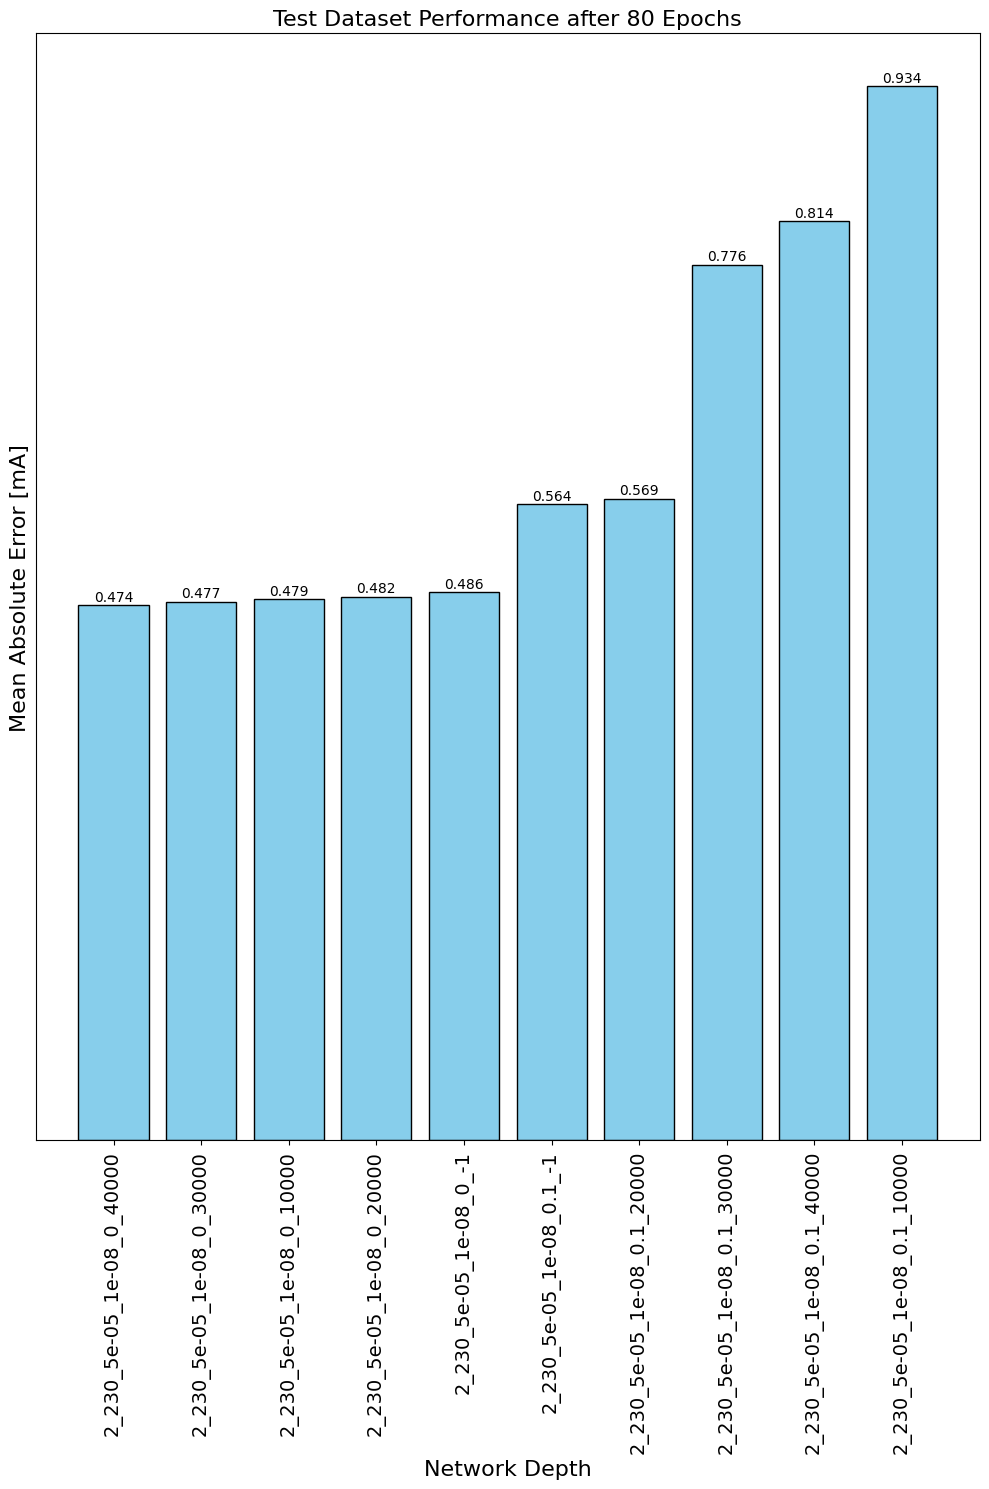

In [36]:
fig,ax=plt.subplots(1,figsize=(10,15),tight_layout=True)
values = [i['value']*1e3 for i in results]
label = "{}"
#labels = range(1,11)
labels = [i['label'].split("_")[-2]+"-"+i['label'].split("_")[-1] for i in results]
labels = [i['label'] for i in results]
bars = ax.bar(labels, values,color="skyblue", edgecolor="black")
ax.bar_label(bars, fmt='%.3f', padding=1)  # Add value labels on top of the bars
ax.set_yticks([])
ax.set_xlabel("Network Depth")
ax.set_ylabel("Mean Absolute Error [mA]")
ax.set_title("Test Dataset Performance after 80 Epochs")
ax.tick_params(axis='x', labelrotation=90)
#plt.savefig("figures/test_tune_80/test_tune_bars.png")

In [37]:
results = []
for i in range(1, 7):
    model_path = path + f"/{i}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)

    value = tf.reduce_sum([tf.size(variable).numpy() for variable in model.trainable_variables])
    print(value)
    results.append({'value': value, 'depth': i})

ValueError: File not found: filepath=/home/guney/PycharmProjects/Summerproject/out/out/2024-07-10-135245//1/my_model_try.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
values = [val['value'] for val in results]
plt.plot(values)

In [ ]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

In [ ]:
inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

In [ ]:
np.mean(np.abs(inference-output))

In [ ]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [ ]:
inputcut =np.copy(input)
inputcut[:,20] = -5

In [ ]:
 inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

In [ ]:
np.mean(np.abs(inference - output))

In [ ]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()